# 1. Importar librerias

In [39]:
import pandas as pd
import numpy as np

import plotly.express as px

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

#Importar módulo de funciones
import sys
sys.path.insert(0, 'utils')  # Añadir el directorio 'utils' al PATH
import funciones
from importlib import reload
reload(funciones)  # Recarga el módulo

<module 'funciones' from 'c:\\recursos_humanos\\utils\\funciones.py'>

# 2. Obtener datos

#### Importar datos

In [3]:
data = pd.read_csv('data/seleccion_gb.csv')

#### Separar variable objetivo y hacer el split

In [4]:
X = data.drop('target', axis = 1)
y = data.target

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Busqueda de hiperparametros

## 3.1 Decision Tree Classifier

#### Definir grilla

In [5]:
parameters = {'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30],
              'max_leaf_nodes': [80,90,100,110,120,130,140,200,210,220,230,240,250],
              'min_samples_leaf': [2,3,5,7,9,11,13,15,17,19,21,23],
              'class_weight': [None,'balanced']}

#### Realizar busqueda

In [6]:
dt = DecisionTreeClassifier(random_state = 42)
rand_s = GridSearchCV(estimator = dt,
                            param_grid = parameters,
                            n_jobs = -1,
                            scoring = 'f1',
                            cv=5,
                            verbose = True)
rand_s.fit(X_train, y_train)

Fitting 5 folds for each of 5304 candidates, totalling 26520 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 20, 25, 30],
                         'max_leaf_nodes': [80, 90, 100, 110, 120, 130, 140,
                                            200, 210, 220, 230, 240, 250],
                         'min_samples_leaf': [2, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                              21, 23]},
             scoring='f1', verbose=True)

#### Modelo con mejores hiperparametros

In [7]:
rand_s.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=25,
                       max_leaf_nodes=240, min_samples_leaf=2, random_state=42)

In [8]:
dt_final = rand_s.best_estimator_

#### Evaluación

------------------------------ TRAIN ------------------------------


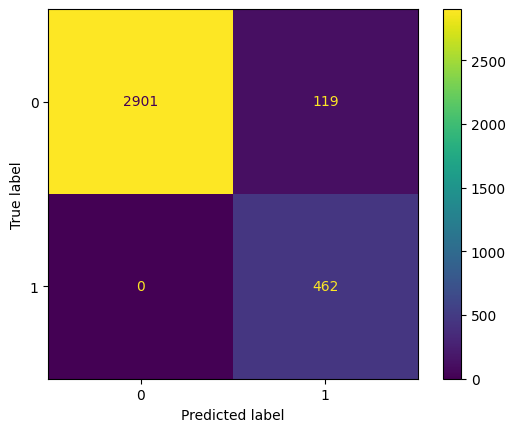

Precision: 0.7951807228915663
Recall: 1.0
Especificidad: 0.9605960264900663
F1 score: 0.8859060402684563
Train score:  0.9658242389431362
------------------------------ TEST ------------------------------


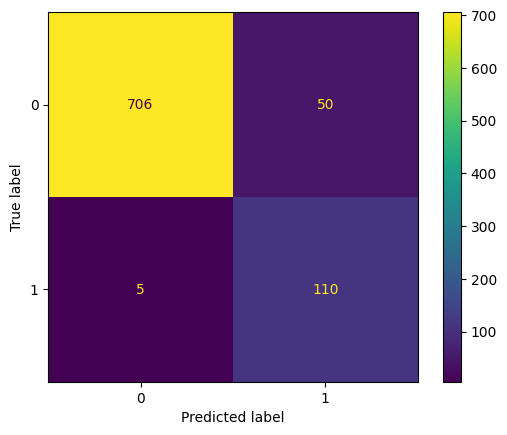

Precision: 0.6875
Recall: 0.9565217391304348
Especificidad: 0.9338624338624338
F1 score: 0.8
Train score:  0.9368541905855339


In [9]:
res_train = funciones.metricas(dt_final,X_train,y_train,'TRAIN')
res_test = funciones.metricas(dt_final,X_test,y_test,'TEST')

------------------------------ TEST ------------------------------


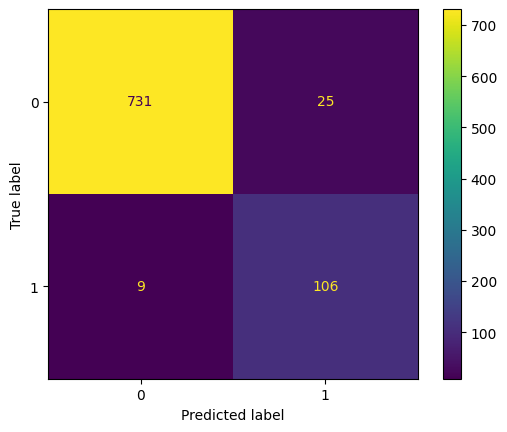

Precision: 0.8091603053435115
Recall: 0.9217391304347826
Especificidad: 0.966931216931217
F1 score: 0.8617886178861789
Train score:  0.9609644087256027


(0.8091603053435115, 0.9217391304347826, 0.966931216931217, 0.8617886178861789)

In [17]:
dt_simple = DecisionTreeClassifier(class_weight='balanced', random_state=42).fit(X_train, y_train)
funciones.metricas(dt_simple, X_test, y_test, 'TEST')

In [37]:
importancias = pd.DataFrame()
importancias['Variable'] = dt_simple.feature_names_in_
importancias['Importancia'] = np.round(dt_simple.feature_importances_, 4)

px.bar(importancias.sort_values(by = 'Importancia', ascending=False),
       y = 'Importancia', x = 'Variable', text='Importancia',
       title='Feature Importances')